In [1]:
#Question 1. how many txt files ? do we know the exact number?
#Question 2 EC8SPEC(agR,2,2,TD,5)*TD*TD/(4*pi*pi);
#Question 3 Sae=9.81*interp1(T,SA,Τ1,'pchip'); 
#Question 4 for iiii=1:length(SA)
#SV(iiii)=9.81*SA(iiii)*(T(iiii)/(2*pi))^2;
#end
#TC=T(find(SV==max(SV(1:90)))); 


#guide https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html
#check nearest points
#check shapely , unary union

# https://www.youtube.com/watch?v=t7lliJXFt8w
# https://www.youtube.com/watch?v=qfJFYlfPbrE 
# https://drive.google.com/drive/folders/1fHeUYrZo0Uzilw0-LdIpBfNgCccU1IRa

# pip install pyshp  , https://pypi.org/project/pyshp/
# pip install geopandas 
# pip install bokeh
import shapefile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
## conda install -c conda-forge geopandas
## conda install descartes
import geopandas as gpd
import descartes
S = gpd.read_file("structural.shp")
HG = gpd.read_file("acceleration.shp")
HG.drop(columns=['X', 'Y'],inplace=True)

In [3]:
S.columns

Index(['id', 'name', 'address', 'material', 'floor no.', 'year', 'notes',
       'area', 'volume', 'height', 'xtr-height', 'geometry'],
      dtype='object')

In [4]:
print("Structural Shape:", S.shape)
print("----------------------------------------------------------")
print("Structural Column names:", S.columns)
print("----------------------------------------------------------")
print("Structural Info:", S.info())
print("----------------------------------------------------------")
print("----------------------------------------------------------")
print("----------------------------------------------------------")
print("Acceleration Shape:", HG.shape)
print("----------------------------------------------------------")
print("Acceleration Column names:", HG.columns)
print("----------------------------------------------------------")
print("Acceleration Info:", HG.info())

Structural Shape: (16, 12)
----------------------------------------------------------
Structural Column names: Index(['id', 'name', 'address', 'material', 'floor no.', 'year', 'notes',
       'area', 'volume', 'height', 'xtr-height', 'geometry'],
      dtype='object')
----------------------------------------------------------
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          16 non-null     int64   
 1   name        16 non-null     object  
 2   address     13 non-null     object  
 3   material    0 non-null      object  
 4   floor no.   10 non-null     object  
 5   year        5 non-null      object  
 6   notes       0 non-null      object  
 7   area        13 non-null     float64 
 8   volume      13 non-null     float64 
 9   height      13 non-null     float64 
 10  xtr-height  5 non-null      float64 
 11  geometry  

In [5]:
#Coordinate reference system
#gdf = gdf.to_crs(epsg = 32629)    Change coordinate reference system
print("Initial CRS ")
print(S.crs)
print(HG.crs)
HG = HG.to_crs(S.crs)
#HG.to_crs('epsg:3004',inplace=True)
print("After CRS change")
print(S.crs)
print(HG.crs)

Initial CRS 
epsg:3004
epsg:3857
After CRS change
epsg:3004
epsg:3004


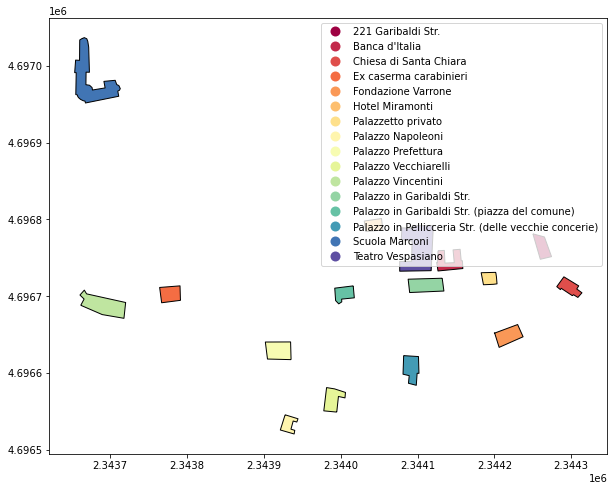

In [6]:
S.plot(cmap = "Spectral", column = "name" ,legend=True, edgecolor = "black" , figsize = (10,10)) #instead of cmap USE color = "red"
plt.show()

In [7]:
S
#S.geometry.bounds

,id,name,address,material,floor no.,year,notes,area,volume,height,xtr-height,geometry
0,2,Palazzo Vecchiarelli,57 Roma Str.,None,3?,around 1550,None,576.62,11941.80,20.71,NaN,"POLYGON ((2343994.912 4696549.222, 2343978.047..."
1,6,Palazzo Prefettura,10 San Pietro Martire Str. (piazza Cesare Batt...,None,2,None,None,776.83,19700.41,25.36,NaN,"POLYGON ((2343935.439 4696617.500, 2343904.744..."
2,3,Palazzo in Pellicceria Str. (delle vecchie con...,22 Pellicceria Str. + 56 Crispolti Str.,None,None,None,None,1121.00,20334.94,12.88,18.14,"POLYGON ((2344082.002 4696622.705, 2344101.258..."
3,4,Palazzo in Garibaldi Str.,264 Garibaldi Str.,None,2?,before earthquake in 800,None,1403.54,24323.35,16.27,17.33,"POLYGON ((2344132.158 4696723.450, 2344134.357..."
4,5,Hotel Miramonti,6 Pescheria Str.,None,3,None,None,240.64,5645.41,23.46,NaN,"POLYGON ((2344053.160 4696801.113, 2344054.926..."
5,1,Palazzo Napoleoni,22 del Porto Str.,None,None,ancient palace set on Roman remains,None,575.11,4589.38,7.00,8.96,"POLYGON ((2343927.678 4696545.696, 2343944.453..."
6,7,Palazzo in Garibaldi Str. (piazza del comune),302 Garibaldi Str.,None,1?,declared unfit for earthquake damage in 2016,None,715.84,10751.92,15.02,NaN,"POLYGON ((2344016.346 4696713.491, 2344017.752..."
7,8,221 Garibaldi Str.,221 Garibaldi Str.,None,3,None,None,287.33,4505.34,15.68,NaN,"POLYGON ((2344250.239 4696781.210, 2344265.190..."
8,9,Teatro Vespasiano,via Garibaldi 267,None,2+,None,None,3172.82,41976.41,13.23,20.44,"POLYGON ((2344120.605 4696792.087, 2344117.751..."
9,11,Chiesa di Santa Chiara,"Via Santa Chiara, 2-4",None,2?,None,None,718.53,13537.11,18.84,29.36,"POLYGON ((2344301.592 4696700.693, 2344287.060..."


In [8]:
HG

,Spectrum,geometry
0,7,POINT (2343710.486 4700645.384)
1,7,POINT (2343714.181 4700645.291)
2,7,POINT (2343717.875 4700645.198)
3,7,POINT (2343651.281 4700643.196)
4,7,POINT (2343654.976 4700643.103)
...,...,...
471752,9,POINT (2343073.746 4695646.663)
471753,9,POINT (2343077.443 4695646.570)
471754,9,POINT (2343081.140 4695646.476)
471755,9,POINT (2343084.837 4695646.383)


In [9]:
#HG.plot()

# Joint on nearest neighbors

In [10]:
gpd1 = S[['name', 'geometry']].copy()
gpd2 = HG[["geometry",'Spectrum']].copy() 

In [11]:
#gdp1["centroid"]=gdp1.centroid
# GET X,Y coordinates from Centroids and set geometry to those X,Y coordinates
def getXY(pt):
    return (pt.x, pt.y)
centroidseries = S['geometry'].centroid
X,Y = [list(t) for t in zip(*map(getXY, centroidseries))]
getXY
# make new columns for X,Y coordinates of centroids

gpd1["X"] = X
gpd1["Y"] = Y

# set geometry to X,Y
gpd1 = gpd.GeoDataFrame(
    gpd1, geometry=gpd.points_from_xy(gpd1.X, gpd1.Y))



from scipy.spatial import cKDTree
from shapely.geometry import Point



def ckdnearest(gdA, gdB):

    nA = np.array(list(gdA.geometry.apply(lambda x: (x.x, x.y))))
    nB = np.array(list(gdB.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nB)
    dist, idx = btree.query(nA, k=1)
    gdB_nearest = gdB.iloc[idx].drop(columns="geometry").reset_index(drop=True)
    gdf = pd.concat(
        [
            gdA.reset_index(drop=True),
            gdB_nearest,
            pd.Series(dist, name='dist')
        ], 
        axis=1)

    return gdf

joint = ckdnearest(gpd1, gpd2)
S["Spectrum"]=joint.Spectrum

In [12]:
print("Item with Spectrum=7: ",S.name[S.Spectrum==7])

Item with Spectrum=7:  14    Scuola Marconi
Name: name, dtype: object


In [13]:
print("Item with Spectrum=8: ",S.name[S.Spectrum==8])

Item with Spectrum=8:  0                                  Palazzo Vecchiarelli
1                                    Palazzo Prefettura
2     Palazzo in Pellicceria Str. (delle vecchie con...
3                             Palazzo in Garibaldi Str.
4                                       Hotel Miramonti
6         Palazzo in Garibaldi Str. (piazza del comune)
7                                    221 Garibaldi Str.
8                                     Teatro Vespasiano
9                                Chiesa di Santa Chiara
10                                   Palazzetto privato
11                                   Palazzo Vincentini
12                               Ex caserma carabinieri
13                                       Banca d'Italia
15                                   Fondazione Varrone
Name: name, dtype: object


In [14]:
print("Item with Spectrum=9: ",S.name[S.Spectrum==9])

Item with Spectrum=9:  5    Palazzo Napoleoni
Name: name, dtype: object


In [15]:
# Make new column
S["typo1"] = np.NaN
S["typo2"] = np.NaN
S["typo3"] = np.NaN
S["typo4"] = np.NaN
S["typo5"] = np.NaN
S["typo6"] = np.NaN
S["use"] = np.NaN
S["WT"] = np.NaN
S

,id,name,address,material,floor no.,year,notes,area,volume,height,...,geometry,Spectrum,typo1,typo2,typo3,typo4,typo5,typo6,use,WT
0,2,Palazzo Vecchiarelli,57 Roma Str.,None,3?,around 1550,None,576.62,11941.80,20.71,...,"POLYGON ((2343994.912 4696549.222, 2343978.047...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,Palazzo Prefettura,10 San Pietro Martire Str. (piazza Cesare Batt...,None,2,None,None,776.83,19700.41,25.36,...,"POLYGON ((2343935.439 4696617.500, 2343904.744...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Palazzo in Pellicceria Str. (delle vecchie con...,22 Pellicceria Str. + 56 Crispolti Str.,None,None,None,None,1121.00,20334.94,12.88,...,"POLYGON ((2344082.002 4696622.705, 2344101.258...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Palazzo in Garibaldi Str.,264 Garibaldi Str.,None,2?,before earthquake in 800,None,1403.54,24323.35,16.27,...,"POLYGON ((2344132.158 4696723.450, 2344134.357...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Hotel Miramonti,6 Pescheria Str.,None,3,None,None,240.64,5645.41,23.46,...,"POLYGON ((2344053.160 4696801.113, 2344054.926...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,Palazzo Napoleoni,22 del Porto Str.,None,None,ancient palace set on Roman remains,None,575.11,4589.38,7.00,...,"POLYGON ((2343927.678 4696545.696, 2343944.453...",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Palazzo in Garibaldi Str. (piazza del comune),302 Garibaldi Str.,None,1?,declared unfit for earthquake damage in 2016,None,715.84,10751.92,15.02,...,"POLYGON ((2344016.346 4696713.491, 2344017.752...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,221 Garibaldi Str.,221 Garibaldi Str.,None,3,None,None,287.33,4505.34,15.68,...,"POLYGON ((2344250.239 4696781.210, 2344265.190...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Teatro Vespasiano,via Garibaldi 267,None,2+,None,None,3172.82,41976.41,13.23,...,"POLYGON ((2344120.605 4696792.087, 2344117.751...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11,Chiesa di Santa Chiara,"Via Santa Chiara, 2-4",None,2?,None,None,718.53,13537.11,18.84,...,"POLYGON ((2344301.592 4696700.693, 2344287.060...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Fill NAN values with 
#gdf.fillna(0, inplace=True)
S.fillna({'typo1':3,'typo2':1,'typo3':2,'typo4':2,'typo5':1,'typo6':2,'use':1,'WT':0.60}, inplace=True)
Stemp = S.copy()
Stemp

,id,name,address,material,floor no.,year,notes,area,volume,height,...,geometry,Spectrum,typo1,typo2,typo3,typo4,typo5,typo6,use,WT
0,2,Palazzo Vecchiarelli,57 Roma Str.,None,3?,around 1550,None,576.62,11941.80,20.71,...,"POLYGON ((2343994.912 4696549.222, 2343978.047...",8,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.6
1,6,Palazzo Prefettura,10 San Pietro Martire Str. (piazza Cesare Batt...,None,2,None,None,776.83,19700.41,25.36,...,"POLYGON ((2343935.439 4696617.500, 2343904.744...",8,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.6
2,3,Palazzo in Pellicceria Str. (delle vecchie con...,22 Pellicceria Str. + 56 Crispolti Str.,None,None,None,None,1121.00,20334.94,12.88,...,"POLYGON ((2344082.002 4696622.705, 2344101.258...",8,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.6
3,4,Palazzo in Garibaldi Str.,264 Garibaldi Str.,None,2?,before earthquake in 800,None,1403.54,24323.35,16.27,...,"POLYGON ((2344132.158 4696723.450, 2344134.357...",8,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.6
4,5,Hotel Miramonti,6 Pescheria Str.,None,3,None,None,240.64,5645.41,23.46,...,"POLYGON ((2344053.160 4696801.113, 2344054.926...",8,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.6
5,1,Palazzo Napoleoni,22 del Porto Str.,None,None,ancient palace set on Roman remains,None,575.11,4589.38,7.00,...,"POLYGON ((2343927.678 4696545.696, 2343944.453...",9,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.6
6,7,Palazzo in Garibaldi Str. (piazza del comune),302 Garibaldi Str.,None,1?,declared unfit for earthquake damage in 2016,None,715.84,10751.92,15.02,...,"POLYGON ((2344016.346 4696713.491, 2344017.752...",8,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.6
7,8,221 Garibaldi Str.,221 Garibaldi Str.,None,3,None,None,287.33,4505.34,15.68,...,"POLYGON ((2344250.239 4696781.210, 2344265.190...",8,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.6
8,9,Teatro Vespasiano,via Garibaldi 267,None,2+,None,None,3172.82,41976.41,13.23,...,"POLYGON ((2344120.605 4696792.087, 2344117.751...",8,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.6
9,11,Chiesa di Santa Chiara,"Via Santa Chiara, 2-4",None,2?,None,None,718.53,13537.11,18.84,...,"POLYGON ((2344301.592 4696700.693, 2344287.060...",8,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.6


In [17]:
# conditional replace
#gdf.loc[gdf.height > 18, 'height'] = 0
#gdf.head()

In [18]:
P1 = pd.DataFrame(np.zeros((len(S), 1)))
P2 = pd.DataFrame(np.zeros((len(S), 1)))
P3 = pd.DataFrame(np.zeros((len(S), 1)))
P4 = pd.DataFrame(np.zeros((len(S), 1)))
P5 = pd.DataFrame(np.zeros((len(S), 1)))
P6 = pd.DataFrame(np.zeros((len(S), 1)))

## STEP 3: Calculating the capacity curve for each building

In [19]:
typo = pd.DataFrame(S.typo1)
use = pd.DataFrame(S.use)
TH = pd.DataFrame(S.height)
Farea = pd.DataFrame(S.area)
Wthick = pd.DataFrame(S.WT)
Hstr = pd.DataFrame(S.typo2)
SS = pd.DataFrame(S.typo3)

In [20]:
Stemp["typo"] = typo
Stemp["use"] = use
Stemp["TH"] = TH
Stemp["Farea"] = Farea
Stemp["Wthick"] = Wthick
Stemp["Hstr"] = Hstr
Stemp["SS"] = SS
Stemp["Aside"]=Stemp["Farea"]**0.5
Stemp.head()

,id,name,address,material,floor no.,year,notes,area,volume,height,...,typo6,use,WT,typo,TH,Farea,Wthick,Hstr,SS,Aside
0,2,Palazzo Vecchiarelli,57 Roma Str.,None,3?,around 1550,None,576.62,11941.80,20.71,...,2.0,1.0,0.6,3.0,20.71,564.012358,0.6,1.0,2.0,23.748944
1,6,Palazzo Prefettura,10 San Pietro Martire Str. (piazza Cesare Batt...,None,2,None,None,776.83,19700.41,25.36,...,2.0,1.0,0.6,3.0,25.36,716.977602,0.6,1.0,2.0,26.776437
2,3,Palazzo in Pellicceria Str. (delle vecchie con...,22 Pellicceria Str. + 56 Crispolti Str.,None,None,None,None,1121.00,20334.94,12.88,...,2.0,1.0,0.6,3.0,12.88,610.857260,0.6,1.0,2.0,24.715527
3,4,Palazzo in Garibaldi Str.,264 Garibaldi Str.,None,2?,before earthquake in 800,None,1403.54,24323.35,16.27,...,2.0,1.0,0.6,3.0,16.27,759.518817,0.6,1.0,2.0,27.559369
4,5,Hotel Miramonti,6 Pescheria Str.,None,3,None,None,240.64,5645.41,23.46,...,2.0,1.0,0.6,3.0,23.46,323.630423,0.6,1.0,2.0,17.989731


In [21]:
NS=TH/3
print("Original NS")
print(NS)
print("-------------------------------")
print("After <1  == 1 replacement")
print("-------------------------------")
NS.loc[NS.height < 1, 'height'] = 1
print(NS)
Stemp["NS"] = NS

Original NS
      height
0   6.903333
1   8.453333
2   4.293333
3   5.423333
4   7.820000
5   2.333333
6   5.006667
7   5.226667
8   4.410000
9   6.280000
10  4.760000
11  8.633333
12  4.703333
13       NaN
14       NaN
15       NaN
-------------------------------
After <1  == 1 replacement
-------------------------------
      height
0   6.903333
1   8.453333
2   4.293333
3   5.423333
4   7.820000
5   2.333333
6   5.006667
7   5.226667
8   4.410000
9   6.280000
10  4.760000
11  8.633333
12  4.703333
13       NaN
14       NaN
15       NaN


In [22]:
# average intestory height
ISH = ( TH / NS )
Stemp["ISH"] = ISH
print(ISH)

    height
0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
5      3.0
6      3.0
7      3.0
8      3.0
9      3.0
10     3.0
11     3.0
12     3.0
13     NaN
14     NaN
15     NaN


 ##   3.1 Estimation of the eigenperiod %%%%%%%
 ### Approximate calculation of the eigenperiod. For masonry buildings (typo=1 to 7) an approximate calculation is made based on the footprint area Farea and assuming an approximate quadrangle shape. Then the formula of eurocode is applied (with analytical calculation of Ct (T11) and assuming Ct=0.050 (T12).ν Finally the minimum value is % selected. For RC buildings (typo=8,9,10) the value Ct=0.075 is selected.
    

In [23]:
typo

,typo1
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
5,3.0
6,3.0
7,3.0
8,3.0
9,3.0


In [24]:

from numpy import minimum
Aside = Farea ** 0.5
Ac = 2 * (Aside[0] * Wthick["WT"] * (0.2 + (Aside[0] / TH["height"])) ** 2)
Ct = 0.075 / np.sqrt(Ac)
T11 = Ct * TH["height"] ** (3 / 4)
T12 = 0.050 * TH["height"] ** (3 / 4)

typo.loc[(typo['typo1'] > 0) & (typo['typo1'] < 8)  ,  'T1'] = minimum(T11,T12)
typo.loc[(typo['typo1'] < 0) & (typo['typo1'] >= 8)  ,  'T1'] = 0.075 * TH["height"] ** (3 / 4)
Stemp["T1"]=typo["T1"]

## 3.2 Evaluation of the yielding, ay, acceleration of every building made of unreinforced masonry. Ιt covers only masonry structures

In [25]:
Stemp.loc[(Stemp['typo1'] == 1)  ,  't0'] = 0.03
Stemp.loc[Stemp['typo1'] == 1   ,  'gamma'] = 19
Stemp.loc[Stemp['typo1'] == 1   ,  'deltau'] = 0.004

Stemp.loc[Stemp['typo1'] == 2   ,  't0'] = 0.02
Stemp.loc[Stemp['typo1'] == 2   ,  'gamma'] = 15
Stemp.loc[Stemp['typo1'] == 2   ,  'deltau'] = 0.004

Stemp.loc[Stemp['typo1'] == 3   ,  't0'] = 0.07
Stemp.loc[Stemp['typo1'] == 3   ,  'gamma'] = 21
Stemp.loc[Stemp['typo1'] == 3   ,  'deltau'] = 0.007

Stemp.loc[Stemp['typo1'] == 4   ,  't0'] = 0.12
Stemp.loc[Stemp['typo1'] == 4   ,  'gamma'] = 22
Stemp.loc[Stemp['typo1'] == 4   ,  'deltau'] = 0.007

Stemp.loc[Stemp['typo1'] == 5   ,  't0'] = 0.09
Stemp.loc[Stemp['typo1'] == 5   ,  'gamma'] = 18

Stemp.loc[(Stemp['typo1'] == 5) & (Stemp['Hstr'] == 1)   ,  'deltau'] = 0.004
Stemp.loc[(Stemp['typo1'] == 5) & (Stemp['Hstr'] == 2)   ,  'deltau'] = 0.004
Stemp.loc[(Stemp['typo1'] == 5) & (Stemp['Hstr'] == 3)   ,  'deltau'] = 0.007
Stemp.loc[(Stemp['typo1'] == 5) & (Stemp['Hstr'] == 4)   ,  'deltau'] = 0.007

Stemp.loc[Stemp['typo1'] == 6   ,  't0'] = 0.12
Stemp.loc[Stemp['typo1'] == 6   ,  'gamma'] = 16
Stemp.loc[Stemp['typo1'] == 6   ,  'deltau'] = 0.007

Stemp.loc[Stemp['typo1'] == 7   ,  't0'] = 0.12
Stemp.loc[Stemp['typo1'] == 7   ,  'gamma'] = 22
Stemp.loc[Stemp['typo1'] == 7   ,  'deltau'] = 0.007

In [26]:
#Load (KN/m2)
Stemp.loc[Stemp['Hstr'] == 1   ,  'p'] = 2.0
Stemp.loc[Stemp['Hstr'] == 2   ,  'p'] = 7.0
Stemp.loc[Stemp['Hstr'] == 3   ,  'p'] = 3.5
Stemp.loc[(Stemp['Hstr'] == 4) & (Stemp['use'] == 1)  ,  'p'] = 2
Stemp.loc[(Stemp['Hstr'] == 4) & (Stemp['use'] == 2)  ,  'p'] = 5

In [27]:
# Compressive strength (MPa)
Stemp["sigma0"]=(Stemp["NS"]*Stemp["p"]+Stemp["gamma"]*Stemp["Farea"]*Stemp["ISH"]* (1+(Stemp["NS"]-1)**1.3) )/100
# Shear strenth
Stemp["t"]=Stemp["t0"]* ((1+Stemp["sigma0"]/Stemp["t0"])**0.5)

In [28]:
# xi is a parameter that taking into account the
#     non-uniform contribution of each masonry panel
#     and defined by an expert judgement (Cattari et al. 2004)
#     here it is assumed as xi=1.0

In [29]:
xi=1.0
Stemp["a1"]=2* (Stemp["Aside"] * Stemp["Wthick"])/Stemp["Farea"]
# Yielding acceleration ay
Stemp["ay"] = 0.5*(Stemp["t"]*Stemp["a1"]*xi*(0.8+0.2*Stemp["NS"])) /  (0.75+0.25*(Stemp["NS"]**(-0.75))*Stemp["sigma0"])
# Modal participation factor
Stemp["lambda"] = (2/3+(1/(3*Stemp["NS"])))**(-1)
# Calculate the yield displacement as follows
Stemp["dy"]=9.81*(Stemp["ay"]*(Stemp["T1"]/(2*np.pi))**2);
# Ultimate displacement du
Stemp.loc[Stemp['SS'] == 1   ,  'du'] = Stemp["deltau"]*Stemp["ISH"]+Stemp["dy"]*(1-Stemp["lambda"]/Stemp["NS"])
Stemp.loc[Stemp['SS'] == 2   ,  'du'] = Stemp["deltau"]*Stemp["NS"]*Stemp["ISH"]/Stemp["lambda"]
# Ductility
Stemp["m"]=Stemp["du"]/Stemp["dy"]
# Define damage limit states
Stemp["Sd1"]=0.7*Stemp["dy"]
Stemp.loc[ 1.5*Stemp['dy'] < 0.5*(Stemp['dy']+Stemp['du'])    ,  'Sd2'] = 1.5*Stemp['dy']
Stemp.loc[ 1.5*Stemp['dy'] >= 0.5*(Stemp['dy']+Stemp['du'])    ,  'Sd2'] = Stemp['dy']
Stemp["Sd3"]=0.5*(Stemp["dy"]+Stemp["du"])
Stemp["Sd4"]=Stemp["du"]

In [30]:
# Parameter for agR
alpha=range(0,1,101)

## 4.0 Seismic Hazard

In [31]:
#Calculate the center of each BoundingBox and the relevant spectrum  based on the nearest point of acceleration

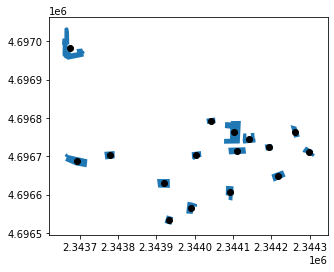

In [32]:
#Plot Centroids of each Polygon
ax = S.centroid.plot(color='k', zorder=2)
S.plot(ax=ax, zorder=1)
#get centroids to a list
def getXY(pt):
    return (pt.x, pt.y)
centroidseries = S['geometry'].centroid
Xcen,Ycen = [list(t) for t in zip(*map(getXY, centroidseries))]
getXY
Stemp["Xcen"] = Xcen
Stemp["Ycen"] = Ycen

In [33]:
g=9.81

In [34]:
def find_nearest(array,value):
    array= np.asarray(array)
    idx=(np.abs(array-value)).argmin()
    pos = np.where(T7 == idx)
    
    return array[idx],pos


In [35]:
# READ and store Spectrum *.txt files 
import glob
import pandas as pd
import csv 
spec= pd.DataFrame()
print(glob.glob("*.txt")) 
mylist = [f for f in glob.glob("*.txt")]
dict={}
dict={"1":[],"2":[],"3":[],"4":[],"5":[],"6":[],"7":[],"8":[],"9":[],"10":[],}
for i in mylist:
    df = pd.read_csv(i, index_col=None, sep='\s+',header=None)
    
    names= i
    names = names.translate({ord('t'): None})
    names = names.translate({ord('x'): None})
    names = names.translate({ord('.'): None})
    
    dict[names].append(df)
    
print(dict)
asd = list(dict.items())
asd = np.array(asd)
asd

try:
    spec["T1"]=asd[0][1][0][0]
    spec["SV1"]=(9.81*asd[0][1][0][1] * ( spec.T7/ (2*np.pi)   ))
    Stemp["TC1"]=spec.SV1.max()
    Stemp["Sae1"]= np.nan
    T1 = np.asarray(spec.T1)
    SV1 = np.asarray(spec.SV1)
    for i in range(len(S)):
        idx , pos = find_nearest(T1,Stemp.T1[i])
#find position of nearest value in T7
        print("T1", i)
        pos = np.where(spec["T1"] == idx)
        pos = pos[0][0]
        SV1= pd.DataFrame(SV1)
        Sae1= g*SV1.loc[pos,0]
        Stemp["Sae1"][i]= Sae1
except:
    pass

try:
    spec["T2"]=asd[1][1][0][0]
    spec["SV2"]=(9.81*asd[1][1][0][1] * ( spec.T7/ (2*np.pi)   ))
    Stemp["TC2"]=spec.SV2.max()
    Stemp["Sae2"]= np.nan
    T2 = np.asarray(spec.T2)
    SV2 = np.asarray(spec.SV2)
    for i in range(len(S)):
        idx , pos = find_nearest(T2,Stemp.T1[i])
#find position of nearest value in T7
        print("T2", i)
        pos = np.where(spec["T2"] == idx)
        pos = pos[0][0]
        SV2 = pd.DataFrame(SV2)
        Sae2 = g*SV2.loc[pos,0]
        Stemp["Sae2"][i]= Sae2
except:
    pass

try:
    spec["T3"]=asd[2][1][0][0]
    spec["SV3"]=(9.81*asd[2][1][0][1] * ( spec.T7/ (2*np.pi)   ))
    Stemp["TC3"]=spec.SV3.max()
    Stemp["Sae3"]= np.nan
    T3 = np.asarray(spec.T3)
    SV3 = np.asarray(spec.SV3)
    for i in range(len(S)):
        idx , pos = find_nearest(T3,Stemp.T1[i])
#find position of nearest value in T7
        print("T3", i)
        pos = np.where(spec["T3"] == idx)
        pos = pos[0][0]
        SV6= pd.DataFrame(SV6)
        Sae3= g*SV3.loc[pos,0]
        Stemp["Sae3"][i]= Sae3
except:
    pass

try:
    spec["T4"]=asd[3][1][0][0]
    spec["SV4"]=(9.81*asd[3][1][0][1] * ( spec.T7/ (2*np.pi)   ))
    Stemp["TC4"]=spec.SV4.max()
    Stemp["Sae4"]= np.nan
    T4 = np.asarray(spec.T4)
    SV4 = np.asarray(spec.SV4)
    for i in range(len(S)):
        idx , pos = find_nearest(T4,Stemp.T1[i])
#find position of nearest value in T7
        print("T4", i)
        pos = np.where(spec["T4"] == idx)
        pos = pos[0][0]
        SV4= pd.DataFrame(SV4)
        Sae4= g*SV4.loc[pos,0]
        Stemp["Sae4"][i]= Sae4
except:
    pass

try:
    spec["T5"]=asd[4][1][0][0]
    spec["SV5"]=(9.81*asd[4][1][0][1] * ( spec.T7/ (2*np.pi)   ))
    Stemp["TC5"]=spec.SV5.max()
    Stemp["Sae5"]= np.nan
    T5 = np.asarray(spec.T5)
    SV5 = np.asarray(spec.SV5)
    for i in range(len(S)):
        idx , pos = find_nearest(T5,Stemp.T1[i])
#find position of nearest value in T7
        print("T5", i)
        pos = np.where(spec["T5"] == idx)
        pos = pos[0][0]
        SV5= pd.DataFrame(SV5)
        Sae5= g*SV5.loc[pos,0]
        Stemp["Sae5"][i]= Sae5
    
except:
    pass

try:
    spec["T6"]=asd[5][1][0][0]
    spec["SV6"]=(9.81*asd[5][1][0][1] * ( spec.T7/ (2*np.pi)   ))
    Stemp["TC6"]=spec.SV6.max()
    Stemp["Sae6"]= np.nan
    T6 = np.asarray(spec.T6)
    SV6 = np.asarray(spec.SV6)
    for i in range(len(S)):
        idx , pos = find_nearest(T6,Stemp.T1[i])
#find position of nearest value in T7
        print("T6", i)
        pos = np.where(spec["T6"] == idx)
        pos = pos[0][0]
        SV6= pd.DataFrame(SV6)
        Sae6= g*SV6.loc[pos,0]
        Stemp["Sae6"][i]= Sae6
except:
    pass


try:
    spec["T7"]=asd[6][1][0][0]
    spec["SV7"]=(9.81*asd[6][1][0][1] * ( spec.T7/ (2*np.pi)   ))
    Stemp["TC7"]=spec.SV7.max()
    Stemp["Sae7"]= np.nan
    T7 = np.asarray(spec.T7)
    SV7 = np.asarray(spec.SV7)
    for i in range(len(S)):
        idx , pos = find_nearest(T7,Stemp.T1[i])
#find position of nearest value in T7
        print("T7", i)
        pos = np.where(spec["T7"] == idx)
        pos = pos[0][0]
        SV7= pd.DataFrame(SV7)
        Sae7= g*SV7.loc[pos,0]
        Stemp["Sae7"][i]= Sae7
        print("T1:  ",Stemp.T1[i])
        print("T7 closest value to T1:  ",T7[pos])
        print("position of nearest value of T7 to T1:  ",pos)
        print("Value of SV7 which corresponds to the avove position :  ",SV7.loc[pos,0])
        print("Sae7 value :  ",Sae7)
       
except:
    pass


try:
    spec["T8"]=asd[7][1][0][0]
    spec["SV8"]=(9.81*asd[7][1][0][1] * ( spec.T7/ (2*np.pi)   ))
    Stemp["TC8"]=spec.SV8.max()
    Stemp["Sae8"]= np.nan
    T8 = np.asarray(spec.T8)
    SV8 = np.asarray(spec.SV8)
    for i in range(len(S)):
        idx , pos = find_nearest(T8,Stemp.T1[i])
#find position of nearest value in T7
        print("T8", i)
        pos = np.where(spec["T8"] == idx)
        pos = pos[0][0]
        SV8= pd.DataFrame(SV8)
        Sae8= g*SV8.loc[pos,0]
        Stemp["Sae8"][i]= Sae8
     
except:
    pass

try:
    spec["T9"]=asd[8][1][0][0]
    spec["SV9"]=(9.81*asd[8][1][0][1] * ( spec.T7/ (2*np.pi)   ))
    Stemp["TC9"]=spec.SV9.max()
    Stemp["Sae9"]= np.nan
    T9 = np.asarray(spec.T9)
    SV9 = np.asarray(spec.SV9)
    for i in range(len(S)):
        idx , pos = find_nearest(T9,Stemp.T1[i])
#find position of nearest value in T7
        print("T9", i)
        pos = np.where(spec["T9"] == idx)
        pos = pos[0][0]
        SV9= pd.DataFrame(SV9)
        Sae9= g*SV9.loc[pos,0]
        Stemp["Sae9"][i]= Sae9
except:
    pass


['7.txt', '8.txt', '9.txt']
{'1': [], '2': [], '3': [], '4': [], '5': [], '6': [], '7': [         0       1
0   0.0100  0.3241
1   0.0106  0.3243
2   0.0113  0.3245
3   0.0120  0.3248
4   0.0127  0.3251
..     ...     ...
95  3.1400  0.0273
96  3.3359  0.0249
97  3.5440  0.0231
98  3.7651     NaN
99  4.0000     NaN

[100 rows x 2 columns]], '8': [         0       1
0   0.0100  0.2436
1   0.0106  0.2437
2   0.0113  0.2439
3   0.0120  0.2440
4   0.0127  0.2442
..     ...     ...
95  3.1400  0.0296
96  3.3359  0.0265
97  3.5440  0.0241
98  3.7651  0.0222
99  4.0000  0.0203

[100 rows x 2 columns]], '9': [         0       1
0   0.0100  0.2600
1   0.0106  0.2601
2   0.0113  0.2602
3   0.0120  0.2603
4   0.0127  0.2604
..     ...     ...
95  3.1400  0.0324
96  3.3359  0.0291
97  3.5440  0.0257
98  3.7651  0.0231
99  4.0000  0.0211

[100 rows x 2 columns]], '10': []}
T7 0
T1:   0.10127457736300052
T7 closest value to T1:   0.0997
position of nearest value of T7 to T1:   38
Value of SV7 which 

C:\Users\Quantum\AppData\Local\Temp/ipykernel_40328/3217743192.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  asd = np.array(asd)
C:\Users\Quantum\AppData\Local\Temp/ipykernel_40328/3217743192.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stemp["Sae7"][i]= Sae7
C:\Users\Quantum\AppData\Local\Temp/ipykernel_40328/3217743192.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stemp["Sae7

In [36]:
Stemp

,id,name,address,material,floor no.,year,notes,area,volume,height,...,Sd3,Sd4,Xcen,Ycen,TC7,Sae7,TC8,Sae8,TC9,Sae9
0,2,Palazzo Vecchiarelli,57 Roma Str.,None,3?,around 1550,None,576.62,11941.80,20.71,...,0.051828,0.103647,2.343990e+06,4.696566e+06,0.341989,0.969677,0.474357,0.649454,0.611207,0.596924
1,6,Palazzo Prefettura,10 San Pietro Martire Str. (piazza Cesare Batt...,None,2,None,None,776.83,19700.41,25.36,...,0.062680,0.125347,2.343919e+06,4.696629e+06,0.341989,1.548827,0.474357,0.912626,0.611207,0.858221
2,3,Palazzo in Pellicceria Str. (delle vecchie con...,22 Pellicceria Str. + 56 Crispolti Str.,None,None,None,None,1121.00,20334.94,12.88,...,0.033554,0.067107,2.344092e+06,4.696606e+06,0.341989,0.280511,0.474357,0.198249,0.611207,0.192408
3,4,Palazzo in Garibaldi Str.,264 Garibaldi Str.,None,2?,before earthquake in 800,None,1403.54,24323.35,16.27,...,0.041464,0.082927,2.344111e+06,4.696714e+06,0.341989,0.369281,0.474357,0.269545,0.611207,0.241799
4,5,Hotel Miramonti,6 Pescheria Str.,None,3,None,None,240.64,5645.41,23.46,...,0.058270,0.116480,2.344043e+06,4.696792e+06,0.341989,2.397403,0.474357,2.267353,0.611207,1.731209
5,1,Palazzo Napoleoni,22 del Porto Str.,None,None,ancient palace set on Roman remains,None,575.11,4589.38,7.00,...,0.019834,0.039667,2.343932e+06,4.696533e+06,0.341989,0.137242,0.474357,0.100907,0.611207,0.106305
6,7,Palazzo in Garibaldi Str. (piazza del comune),302 Garibaldi Str.,None,1?,declared unfit for earthquake damage in 2016,None,715.84,10751.92,15.02,...,0.038550,0.077093,2.344004e+06,4.696703e+06,0.341989,0.552446,0.474357,0.440015,0.611207,0.380639
7,8,221 Garibaldi Str.,221 Garibaldi Str.,None,3,None,None,287.33,4505.34,15.68,...,0.040090,0.080173,2.344262e+06,4.696764e+06,0.341989,0.623745,0.474357,0.480071,0.611207,0.409673
8,9,Teatro Vespasiano,via Garibaldi 267,None,2+,None,None,3172.82,41976.41,13.23,...,0.034370,0.068740,2.344102e+06,4.696762e+06,0.341989,0.098412,0.474357,0.073682,0.611207,0.078162
9,11,Chiesa di Santa Chiara,"Via Santa Chiara, 2-4",None,2?,None,None,718.53,13537.11,18.84,...,0.047467,0.094920,2.344298e+06,4.696712e+06,0.341989,1.129731,0.474357,0.703953,0.611207,0.652860


In [37]:
spec

,T7,SV7,T8,SV8,T9,SV9
0,0.0100,0.005060,0.0100,0.003803,0.0100,0.004059
1,0.0106,0.005367,0.0106,0.004033,0.0106,0.004305
2,0.0113,0.005725,0.0113,0.004303,0.0113,0.004591
3,0.0120,0.006085,0.0120,0.004572,0.0120,0.004877
4,0.0127,0.006446,0.0127,0.004842,0.0127,0.005163
...,...,...,...,...,...,...
95,3.1400,0.133839,3.1400,0.145114,3.1400,0.158841
96,3.3359,0.129689,3.3359,0.138022,3.3359,0.151564
97,3.5440,0.127819,3.5440,0.133352,3.5440,0.142205
98,3.7651,NaN,3.7651,0.130502,3.7651,0.135793


<AxesSubplot:>

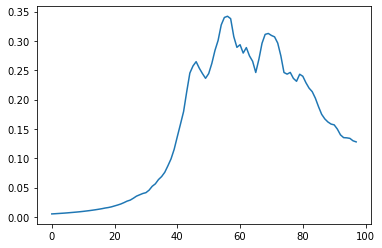

In [38]:
spec["SV7"].plot()

<AxesSubplot:>

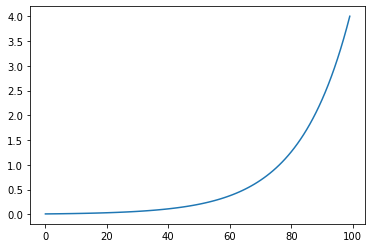

In [39]:
spec["T7"].plot()

In [40]:
Stemp["Sae7"]

0     0.969677
1     1.548827
2     0.280511
3     0.369281
4     2.397403
5     0.137242
6     0.552446
7     0.623745
8     0.098412
9     1.129731
10    0.745331
11    0.745331
12    0.391033
13    0.049641
14    0.049641
15    0.049641
Name: Sae7, dtype: float64

<AxesSubplot:>

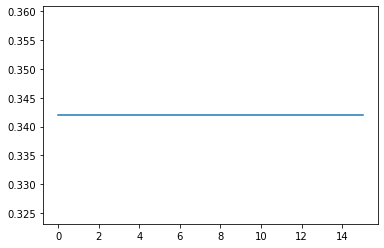

In [41]:
Stemp["TC7"].plot()

In [42]:
TD=4.0



In [43]:
# Estimate the performance point Sdd (m)
Stemp.loc[(Stemp['T1'] < Stemp['TC7']) & (Stemp['Sae7'] / Stemp['ay']  >= 1)  &  (Stemp.Spectrum == 7   )    ,  'Sdd'] = (1+(Stemp.Sae7/Stemp.ay-1.0)*(Stemp.TC7/Stemp.T1))*Stemp.dy;
Stemp.loc[(Stemp['T1'] >= Stemp['TC7']) & (Stemp['T1'] < TD) &  (Stemp.Spectrum == 7   )  ,  'Sdd'] = Stemp.Sae7*Stemp.dy/Stemp.ay
Stemp.loc[(Stemp['Sae7']/Stemp['ay'] <= 1)   &  (Stemp.Spectrum == 7   )  ,  'Sdd'] = Stemp.Sae7*Stemp.dy/Stemp.ay;
Stemp.loc[(Stemp['T1'] >= TD)   &  (Stemp.Spectrum == 7   )  ,  'Sdd'] = Sae7*TD*TD/(4*np.pi*np.pi);  #EC8SPEC(agR,2,2,TD,5)*TD*TD/(4*pi*pi);

In [44]:
# Estimate the performance point Sdd (m)
Stemp.loc[(Stemp['T1'] < Stemp['TC8']) & (Stemp['Sae8'] / Stemp['ay']  >= 1)  &  (Stemp.Spectrum == 8   )    ,  'Sdd'] = (1+(Stemp.Sae8/Stemp.ay-1.0)*(Stemp.TC8/Stemp.T1))*Stemp.dy;
Stemp.loc[(Stemp['T1'] >= Stemp['TC8']) & (Stemp['T1'] < TD) &  (Stemp.Spectrum == 8   )  ,  'Sdd'] = Stemp.Sae8*Stemp.dy/Stemp.ay
Stemp.loc[(Stemp['Sae8']/Stemp['ay'] <= 1)   &  (Stemp.Spectrum == 8   )  ,  'Sdd'] = Stemp.Sae8*Stemp.dy/Stemp.ay;
Stemp.loc[(Stemp['T1'] >= TD)   &  (Stemp.Spectrum == 8   )  ,  'Sdd'] = Sae8*TD*TD/(4*np.pi*np.pi);  #EC8SPEC(agR,2,2,TD,5)*TD*TD/(4*pi*pi);

In [45]:
# Estimate the performance point Sdd (m)
Stemp.loc[(Stemp['T1'] < Stemp['TC9']) & (Stemp['Sae9'] / Stemp['ay']  >= 1)  &  (Stemp.Spectrum == 9   )    ,  'Sdd'] = (1+(Stemp.Sae9/Stemp.ay-1.0)*(Stemp.TC9/Stemp.T1))*Stemp.dy;
Stemp.loc[(Stemp['T1'] >= Stemp['TC9']) & (Stemp['T1'] < TD) &  (Stemp.Spectrum == 9   )  ,  'Sdd'] = Stemp.Sae9*Stemp.dy/Stemp.ay
Stemp.loc[(Stemp['Sae9']/Stemp['ay'] <= 1)   &  (Stemp.Spectrum == 9   )  ,  'Sdd'] = Stemp.Sae9*Stemp.dy/Stemp.ay;
Stemp.loc[(Stemp['T1'] >= TD)   &  (Stemp.Spectrum == 9   )  ,  'Sdd'] = Sae9*TD*TD/(4*np.pi*np.pi);  #EC8SPEC(agR,2,2,TD,5)*TD*TD/(4*pi*pi);

# STEP 5: Seismic Risk Calculation for building

In [46]:
# normalised standard deviation ‚ of the natural logarithm of the
#         displacement % threshold Sd,k has been defined as a function
#         of the capacity curve ductility 


In [47]:

#b=0.4*np.log(Stemp.m);

In [48]:
from scipy.stats import norm
S["P1"]= Stemp["P1"]=norm.cdf(np.log(Stemp.Sdd/Stemp.Sd1)/(0.4*np.log(Stemp.m)))
S["P2"]= Stemp["P2"]=norm.cdf(np.log(Stemp.Sdd/Stemp.Sd2)/(0.4*np.log(Stemp.m)))
S["P3"]= Stemp["P3"]=norm.cdf(np.log(Stemp.Sdd/Stemp.Sd3)/(0.4*np.log(Stemp.m)))
S["P4"]= Stemp["P4"]=norm.cdf(np.log(Stemp.Sdd/Stemp.Sd4)/(0.4*np.log(Stemp.m)))

# STEP 6: Plotting Risk Maps

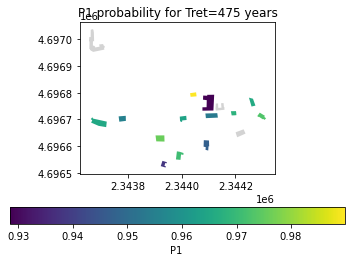

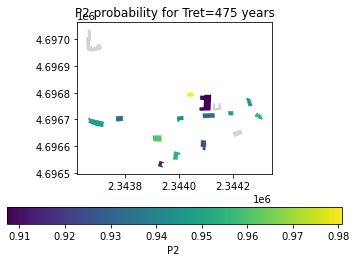

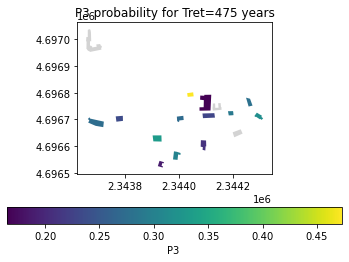

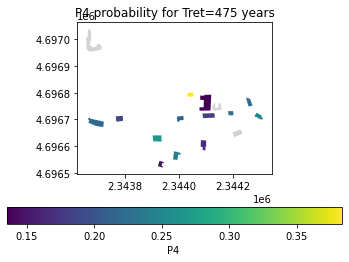

In [49]:
Stemp.plot(column='P1', legend=True, legend_kwds={'label': "P1 ",'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey'})
plt.title("P1 probability for Tret=475 years")
plt.savefig("P1.png")
Stemp.plot(column='P2', legend=True, legend_kwds={'label': "P2 ",'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey'})
plt.title("P2 probability for Tret=475 years")
plt.savefig("P2.png")
Stemp.plot(column='P3', legend=True, legend_kwds={'label': "P3 ",'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey'})
plt.title("P3 probability for Tret=475 years")
plt.savefig("P3.png")
Stemp.plot(column='P4', legend=True, legend_kwds={'label': "P4 ",'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey'})
plt.title("P4 probability for Tret=475 years")
plt.savefig("P4.png")


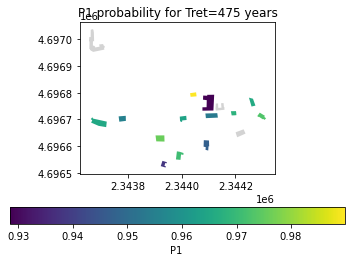

In [50]:
Stemp.plot(column='P1', legend=True, legend_kwds={'label': "P1 ",'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey'})
plt.title("P1 probability for Tret=475 years")
plt.savefig("P1.png")

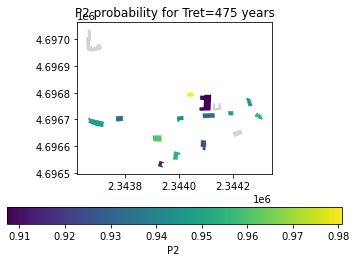

In [51]:
Stemp.plot(column='P2', legend=True, legend_kwds={'label': "P2 ",'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey'})
plt.title("P2 probability for Tret=475 years")
plt.savefig("P2.png")

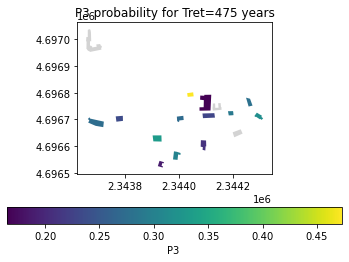

In [52]:
Stemp.plot(column='P3', legend=True, legend_kwds={'label': "P3 ",'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey'})
plt.title("P3 probability for Tret=475 years")
plt.savefig("P3.png")

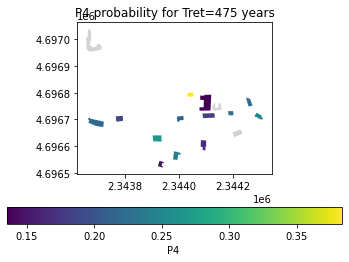

In [53]:
Stemp.plot(column='P4', legend=True, legend_kwds={'label': "P4 ",'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey'})
plt.title("P4 probability for Tret=475 years")
plt.savefig("P4.png")

In [54]:
#S.plot(kind='scatter', x="id", y="P1")
#S.plot(kind='scatter', x="id", y="P2")
#S.plot(kind='scatter', x="id", y="P3")
#S.plot(kind='scatter', x="id", y="P4")

In [55]:
#ax = S.plot(column='name', categorical=True, legend=True, \
#             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
#                         'fmt': "{:.0f}"}) # fmt is ignored for categorical data

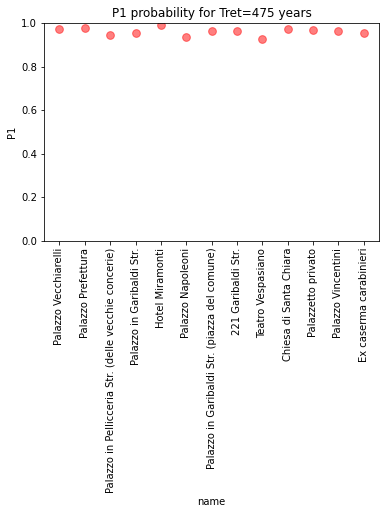

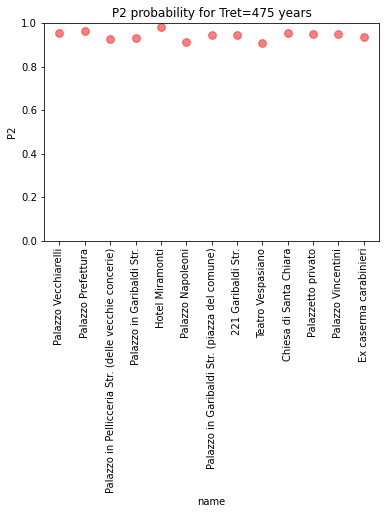

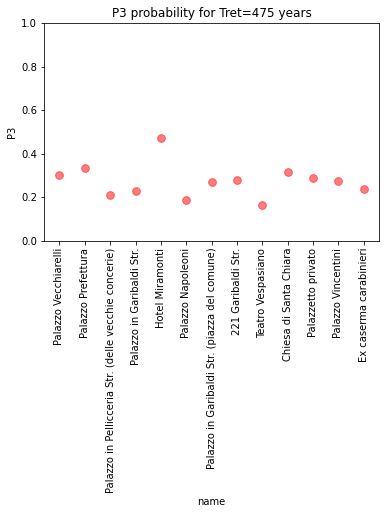

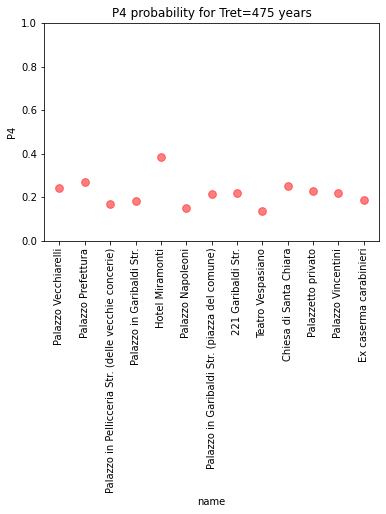

In [56]:
x = S.name
y1 = S.P1
s = 60

plt.scatter(x, y1, s, c="r", alpha=0.5)
plt.xlabel("name")
plt.ylabel("P1")
plt.ylim([0, 1])
plt.xticks(rotation = 90)
plt.title("P1 probability for Tret=475 years")
plt.show()

x = S.name
y2 = S.P2


plt.scatter(x, y2, s, c="r", alpha=0.5)
plt.xlabel("name")
plt.ylabel("P2")
plt.ylim([0, 1])
plt.xticks(rotation = 90)
plt.title("P2 probability for Tret=475 years")
plt.show()

x = S.name
y3 = S.P3


plt.scatter(x, y3, s, c="r", alpha=0.5)
plt.xlabel("name")
plt.ylabel("P3")
plt.ylim([0, 1])
plt.xticks(rotation = 90)
plt.title("P3 probability for Tret=475 years")
plt.show()


x = S.name
y4 = S.P4


plt.scatter(x, y4, s, c="r", alpha=0.5)
plt.xlabel("name")
plt.ylabel("P4")
plt.ylim([0, 1])
plt.xticks(rotation = 90)
plt.title("P4 probability for Tret=475 years")
plt.show()

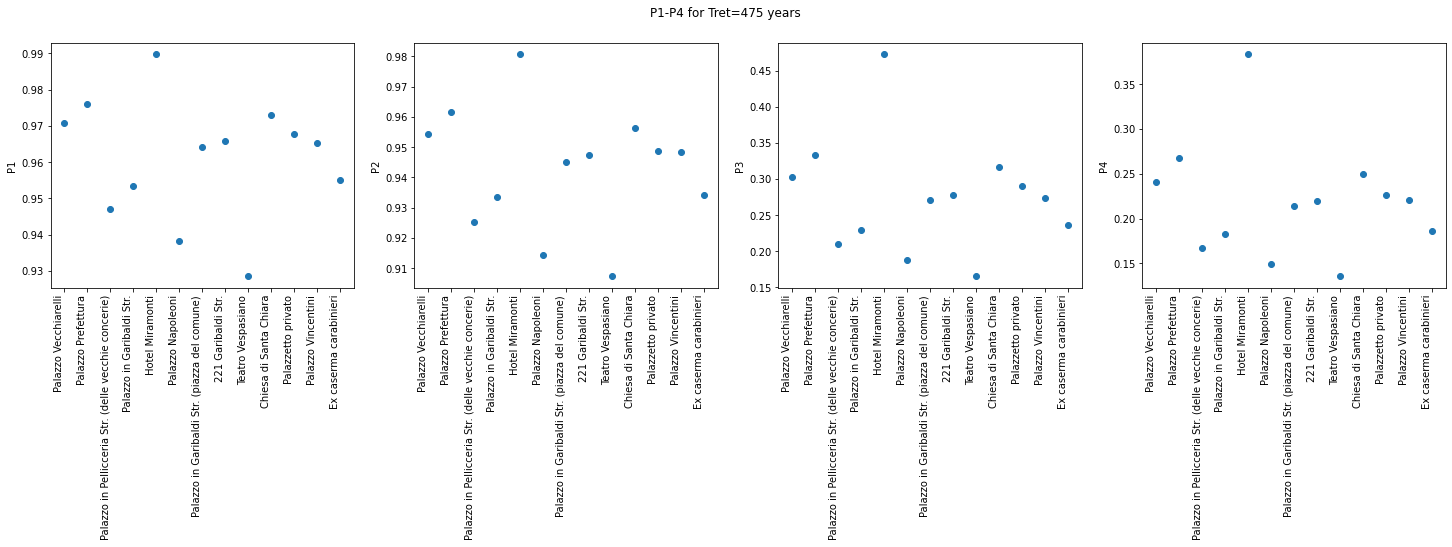

In [57]:
x = S.name
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(25, 5))
fig.suptitle('P1-P4 for Tret=475 years')
ax1.scatter(x, y1)
ax2.scatter(x, y2)
ax3.scatter(x, y3)
ax4.scatter(x, y4)
ax1.set_ylabel("P1")
ax2.set_ylabel("P2")
ax3.set_ylabel("P3")
ax4.set_ylabel("P4")
fig.autofmt_xdate(rotation=90)
#ax1.xaxis.set_tick_params(labelsize=18)
#ax1.yaxis.set_tick_params(labelsize=18)


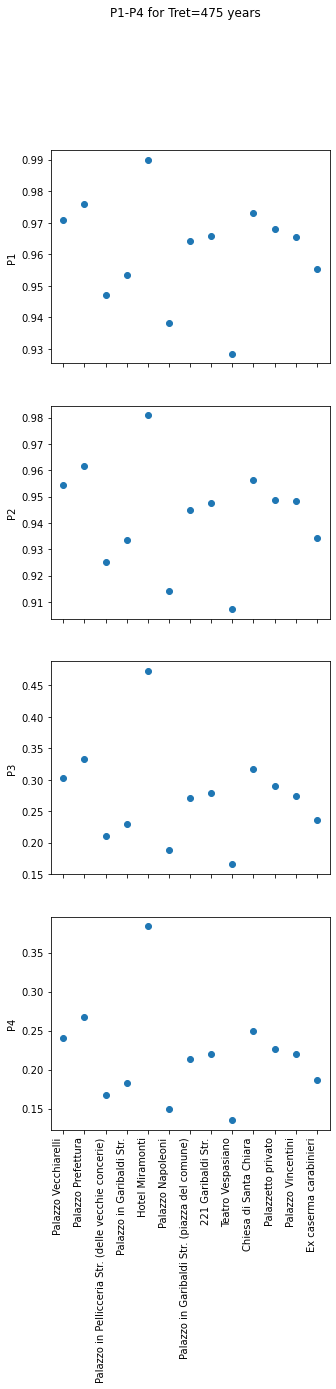

In [58]:
x = S.name
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(5, 20))
fig.suptitle('P1-P4 for Tret=475 years')
ax1.scatter(x, y1)
ax2.scatter(x, y2)
ax3.scatter(x, y3)
ax4.scatter(x, y4)
ax1.set_xlabel("id")
ax1.set_ylabel("P1")
ax2.set_ylabel("P2")
ax3.set_ylabel("P3")
ax4.set_ylabel("P4")
fig.autofmt_xdate(rotation=90)

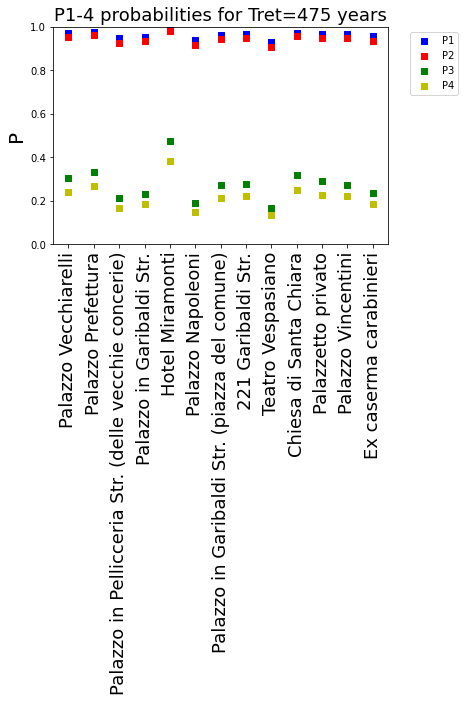

In [59]:
plt.scatter(x,y1, c='b', marker='s', label='P1')
plt.scatter(x, y2, c='r', marker='s', label='P2')
plt.scatter(x, y3, c='g', marker='s', label='P3')
plt.scatter(x, y4, c='y', marker='s', label='P4')
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1))
plt.ylim([0, 1])
plt.xticks(rotation = 90, fontsize=18)
#plt.xlabel("")
plt.title("P1-4 probabilities for Tret=475 years", fontsize=18)
plt.ylabel("P", fontsize=20)
plt.show()

In [60]:
df = pd.DataFrame(columns=["A", "B", "C"])

In [61]:
myvec = np.arange(5, 11)**2
mydf = pd.DataFrame(myvec.reshape(-1, 3))

In [62]:
mydf["A"]=mydf.loc[0]-20
mydf["B"]=mydf.loc[1]-60
mydf["C"]=mydf.loc[1]-80
mydf["C"]=mydf["C"]+20
mydf


,0,1,2,A,B,C
0,25,36,49,5,4,4
1,64,81,100,16,21,21


In [63]:
mydf.loc[(mydf['A'] >= 10)   &  (mydf.B >= 4   )  ,  'Sdd'] = 20000 #EC8SPEC(agR,2,2,TD,5)*TD*TD/(4*pi*pi);
mydf

,0,1,2,A,B,C,Sdd
0,25,36,49,5,4,4,NaN
1,64,81,100,16,21,21,20000.0


In [64]:
mydf.loc[(mydf['A'] <= 10)   &  (mydf.B <= 4   )  ,  'Sdd'] = 10000 #EC8SPEC(agR,2,2,TD,5)*TD*TD/(4*pi*pi);
mydf

,0,1,2,A,B,C,Sdd
0,25,36,49,5,4,4,10000.0
1,64,81,100,16,21,21,20000.0


In [65]:
mydf.loc[(mydf['A'] <= 10)   &  (mydf.B == 4   )  ,  'Sdd'] = 9999 #EC8SPEC(agR,2,2,TD,5)*TD*TD/(4*pi*pi);
mydf

,0,1,2,A,B,C,Sdd
0,25,36,49,5,4,4,9999.0
1,64,81,100,16,21,21,20000.0


In [66]:
mydf

,0,1,2,A,B,C,Sdd
0,25,36,49,5,4,4,9999.0
1,64,81,100,16,21,21,20000.0


In [67]:
a = 7
b = ".txt"
print(f"{a}{b}")
#Spec=pd.dataframe[]
#Spec[a] = pd.read_csv(f"{a}{b}",sep='\s+',header=None)

7.txt


In [68]:
pd.read_csv(f"{a}{b}",sep='\s+',header=None)

,0,1
0,0.0100,0.3241
1,0.0106,0.3243
2,0.0113,0.3245
3,0.0120,0.3248
4,0.0127,0.3251
...,...,...
95,3.1400,0.0273
96,3.3359,0.0249
97,3.5440,0.0231
98,3.7651,NaN


In [69]:
Spec = [col_name+'_df{}'.format(i)

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_40328/1407567338.py, line 1)

In [ ]:
#export to ESRI shapefile 
gdf.to_file("delete_me1.shp", driver = "ESRI Shapefile")

## Start Νοn Crucial

## End Non Crucial

In [ ]:
import libpysal as ps

In [ ]:
# pip install folium
import folium
from shapely.geometry import Point
from folium import plugins
S['centroid'] = S.centroid
S.set_geometry("centroid",inplace=True)
map = folium.Map(location = [15,30], tiles='Cartodb dark_matter', zoom_start = 100)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in S.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map